In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML

        



In [2]:
from tf.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 224

datagen = ImageDataGenerator(validation_split=0.2,
        rescale=1./255,#rescaling pixel values bw [0,1]
        rotation_range=10,#adjusting any error in angle of image
        zoom_range=0.2
)


In [3]:
#this will distribute data in test and training set proportionally for each class
train_generator = datagen.flow_from_directory(
    'dataset',
    target_size=(224, 224),  
    batch_size=16,
    class_mode='sparse',  # Use 'sparse' for integer labels
    subset='training'  # Specify that this is the training set
)

test_generator = datagen.flow_from_directory(
    'dataset',
    target_size=(224, 224), 
    batch_size=16,
    class_mode='sparse',  # Use 'sparse' for integer labels
    subset='validation'  # Specify that this is the validation set
)

Found 21636 images belonging to 8 classes.
Found 5406 images belonging to 8 classes.


In [4]:
class_names = list(train_generator.class_indices.keys())
class_names

['0', '130', '180', '230', '270', '320', '40', '90']

In [5]:
train_generator

In [6]:
sz = 224

# Initializing the CNN
model = Sequential()
model.add(Convolution2D(filters=32, kernel_size=(3, 3), input_shape=(sz, sz, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())#tranferring data into 1D format

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))#will prevent overfitting
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=8, activation='softmax'))

/Users/aaryangoyal/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])


In [10]:
#evaluating test and train accuracy
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=3
)

Epoch 1/3
1353/1353 ━━━━━━━━━━━━━━━━━━━━ 631s 464ms/step - accuracy: 0.7286 - loss: 0.7941 - val_accuracy: 0.8492 - val_loss: 0.4314
Epoch 2/3
1353/1353 ━━━━━━━━━━━━━━━━━━━━ 634s 468ms/step - accuracy: 0.8277 - loss: 0.5188 - val_accuracy: 0.8962 - val_loss: 0.3417
Epoch 3/3
1353/1353 ━━━━━━━━━━━━━━━━━━━━ 663s 489ms/step - accuracy: 0.8563 - loss: 0.4423 - val_accuracy: 0.9005 - val_loss: 0.3294


In [11]:
scores = model.evaluate(test_generator)


338/338 ━━━━━━━━━━━━━━━━━━━━ 83s 247ms/step - accuracy: 0.8982 - loss: 0.3216


In [12]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [13]:
type(history.history['loss'])

list

In [14]:
len(history.history['loss'])


3

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

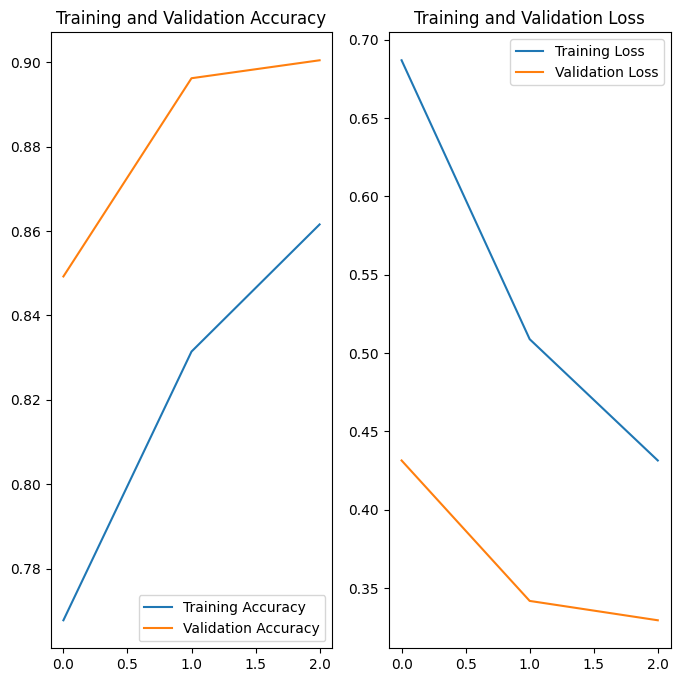

In [16]:
import matplotlib.pyplot as plt
EPOCHS = 3

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()